In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

In [2]:
!pip3 install opencv-python

In [3]:
#load data
fold0 = pd.read_csv("fold_frontal_0_data.txt",sep = "\t" )
fold1 = pd.read_csv("fold_frontal_1_data.txt",sep = "\t")
fold2 = pd.read_csv("fold_frontal_2_data.txt",sep = "\t")
fold3 = pd.read_csv("fold_frontal_3_data.txt",sep = "\t")
fold4 = pd.read_csv("fold_frontal_4_data.txt",sep = "\t")

In [4]:
total_data = pd.concat([fold0, fold1, fold2, fold3, fold4], ignore_index=True)
print(total_data.shape)
total_data.info()

(13560, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13560 entries, 0 to 13559
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             13560 non-null  object
 1   original_image      13560 non-null  object
 2   face_id             13560 non-null  int64 
 3   age                 13560 non-null  object
 4   gender              12991 non-null  object
 5   x                   13560 non-null  int64 
 6   y                   13560 non-null  int64 
 7   dx                  13560 non-null  int64 
 8   dy                  13560 non-null  int64 
 9   tilt_ang            13560 non-null  int64 
 10  fiducial_yaw_angle  13560 non-null  int64 
 11  fiducial_score      13560 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.2+ MB


In [5]:
total_data.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
1,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
2,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34
3,30601258@N03,10424595844_1009c687e4_o.jpg,4,"(38, 43)",f,1912,905,1224,1224,155,0,64
4,30601258@N03,10190308156_5c748ab2da_o.jpg,2,"(25, 32)",m,1013,1039,453,452,-75,0,59


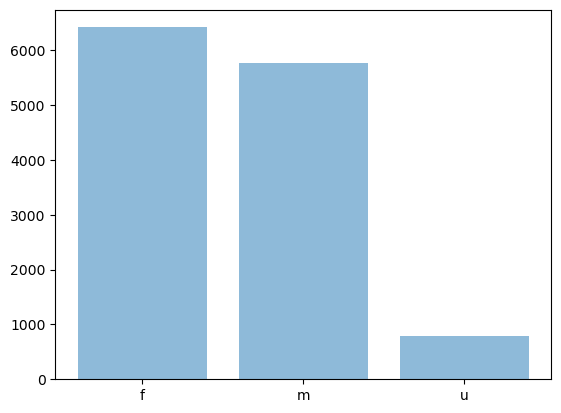

In [6]:
#bar chart
gender = ['f','m','u']
plt.bar(gender, total_data.gender.value_counts(), align='center', alpha=0.5)
plt.show()

In [7]:
!pip install keras
!pip install tensorflow

  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 1.6/1.6 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.9
    Uninstalling flatbuffers-23.5.9:
      Successfully uninstalled flatbuffers-23.5.9
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successf

In [8]:
pip show tensorflow

Name: tensorflow
Version: 2.9.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\ahtes\anaconda3\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

##### path = "faces/"+total_data.user_id.loc[0]+"/coarse_tilt_aligned_face."+str(total_data.face_id.loc[0])+"."+total_data.original_image.loc[0]
img = load_img(path)
plt.imshow(img)
plt.show()

In [10]:
imp_data = total_data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()
imp_data.info()

img_path = []
for row in total_data.iterrows():
    path = "faces/"+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path)

imp_data['img_path'] = img_path
imp_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13560 entries, 0 to 13559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     13560 non-null  object
 1   gender  12991 non-null  object
 2   x       13560 non-null  int64 
 3   y       13560 non-null  int64 
 4   dx      13560 non-null  int64 
 5   dy      13560 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 635.8+ KB


,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",m,301,105,640,641,faces/30601258@N03/coarse_tilt_aligned_face.2....
1,"(25, 32)",m,752,1255,484,485,faces/30601258@N03/coarse_tilt_aligned_face.3....
2,"(25, 32)",m,175,80,769,768,faces/30601258@N03/coarse_tilt_aligned_face.2....
3,"(38, 43)",f,1912,905,1224,1224,faces/30601258@N03/coarse_tilt_aligned_face.4....
4,"(25, 32)",m,1013,1039,453,452,faces/30601258@N03/coarse_tilt_aligned_face.2....


In [11]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]

age_mapping_dict = {each[0]: each[1] for each in age_mapping}
drop_labels = []
for idx, each in enumerate(imp_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        imp_data.age.loc[idx] = age_mapping_dict[each]

imp_data = imp_data.drop(labels=drop_labels, axis=0) #droped None values
imp_data.age.value_counts(dropna=False)



C:\Users\ahtes\AppData\Local\Temp\ipykernel_10452\505261813.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_data.age.loc[idx] = age_mapping_dict[each]


25-32    3543
38-43    1911
0-2      1837
8-13     1694
4-6      1586
15-20    1208
48-53     641
60+       603
Name: age, dtype: int64

In [33]:
mp_data = imp_data.dropna()
clean_data = imp_data[imp_data.gender != 'u'].copy()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12226 entries, 0 to 13557
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       12226 non-null  object
 1   gender    12173 non-null  object
 2   x         12226 non-null  int64 
 3   y         12226 non-null  int64 
 4   dx        12226 non-null  int64 
 5   dy        12226 non-null  int64 
 6   img_path  12226 non-null  object
dtypes: int64(4), object(3)
memory usage: 764.1+ KB


In [34]:
clean_data['gender'].value_counts()

f    6401
m    5772
Name: gender, dtype: int64

In [35]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12226 entries, 0 to 13557
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       12226 non-null  object
 1   gender    12173 non-null  object
 2   x         12226 non-null  int64 
 3   y         12226 non-null  int64 
 4   dx        12226 non-null  int64 
 5   dy        12226 non-null  int64 
 6   img_path  12226 non-null  object
dtypes: int64(4), object(3)
memory usage: 764.1+ KB


In [36]:
clean_data=clean_data.dropna()

In [37]:
clean_data.reset_index(drop=True)

,age,gender,x,y,dx,dy,img_path
0,25-32,m,301,105,640,641,faces/30601258@N03/coarse_tilt_aligned_face.2....
1,25-32,m,752,1255,484,485,faces/30601258@N03/coarse_tilt_aligned_face.3....
2,25-32,m,175,80,769,768,faces/30601258@N03/coarse_tilt_aligned_face.2....
3,38-43,f,1912,905,1224,1224,faces/30601258@N03/coarse_tilt_aligned_face.4....
4,25-32,m,1013,1039,453,452,faces/30601258@N03/coarse_tilt_aligned_face.2....
...,...,...,...,...,...,...,...
12168,25-32,m,0,404,741,769,faces/101515718@N03/coarse_tilt_aligned_face.2...
12169,25-32,f,838,0,656,574,faces/101515718@N03/coarse_tilt_aligned_face.2...
12170,25-32,f,718,748,492,492,faces/101515718@N03/coarse_tilt_aligned_face.2...
12171,25-32,m,48,472,768,768,faces/101515718@N03/coarse_tilt_aligned_face.2...


In [38]:
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,25-32,m,301,105,640,641,faces/30601258@N03/coarse_tilt_aligned_face.2....
1,25-32,m,752,1255,484,485,faces/30601258@N03/coarse_tilt_aligned_face.3....
2,25-32,m,175,80,769,768,faces/30601258@N03/coarse_tilt_aligned_face.2....
3,38-43,f,1912,905,1224,1224,faces/30601258@N03/coarse_tilt_aligned_face.4....
4,25-32,m,1013,1039,453,452,faces/30601258@N03/coarse_tilt_aligned_face.2....


In [39]:
gender_to_label_map = {'f' : 0,'m' : 1}

clean_data['gender'] = clean_data['gender'].apply(lambda g: gender_to_label_map[g])
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,25-32,1,301,105,640,641,faces/30601258@N03/coarse_tilt_aligned_face.2....
1,25-32,1,752,1255,484,485,faces/30601258@N03/coarse_tilt_aligned_face.3....
2,25-32,1,175,80,769,768,faces/30601258@N03/coarse_tilt_aligned_face.2....
3,38-43,0,1912,905,1224,1224,faces/30601258@N03/coarse_tilt_aligned_face.4....
4,25-32,1,1013,1039,453,452,faces/30601258@N03/coarse_tilt_aligned_face.2....


In [40]:
age_to_label_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}

clean_data['age'] = clean_data['age'].apply(lambda age: age_to_label_map[age])
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,4,1,301,105,640,641,faces/30601258@N03/coarse_tilt_aligned_face.2....
1,4,1,752,1255,484,485,faces/30601258@N03/coarse_tilt_aligned_face.3....
2,4,1,175,80,769,768,faces/30601258@N03/coarse_tilt_aligned_face.2....
3,5,0,1912,905,1224,1224,faces/30601258@N03/coarse_tilt_aligned_face.4....
4,4,1,1013,1039,453,452,faces/30601258@N03/coarse_tilt_aligned_face.2....


In [41]:
X = clean_data[['img_path']]
y = clean_data[['gender']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train data shape (8521, 1)
Test data shape (3652, 1)
Train images shape (8521, 227, 227, 3)
Test images shape (3652, 227, 227, 3)


In [42]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        14208     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 layer_normalization (LayerN  (None, 28, 28, 96)       192       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                        

In [43]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # Callback for earlystopping
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, y_train, batch_size=32, epochs=25, validation_data=(test_images, y_test), callbacks=[callback])

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

model.save('gender_model25.h5')

Epoch 1/25


C:\Users\ahtes\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


267/267 [==============================] - ETA: 0s - loss: 1.0026 - accuracy: 0.5200

C:\Users\ahtes\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


267/267 [==============================] - 264s 982ms/step - loss: 1.0026 - accuracy: 0.5200 - val_loss: 0.6923 - val_accuracy: 0.5208
Epoch 2/25
267/267 [==============================] - 261s 979ms/step - loss: 0.6917 - accuracy: 0.5280 - val_loss: 0.6923 - val_accuracy: 0.5208
Epoch 3/25
267/267 [==============================] - 247s 925ms/step - loss: 0.6917 - accuracy: 0.5280 - val_loss: 0.6924 - val_accuracy: 0.5208
Epoch 4/25
267/267 [==============================] - 250s 936ms/step - loss: 0.6917 - accuracy: 0.5280 - val_loss: 0.6927 - val_accuracy: 0.5208
Epoch 5/25
267/267 [==============================] - 270s 1s/step - loss: 0.6917 - accuracy: 0.5280 - val_loss: 0.6923 - val_accuracy: 0.5208
Epoch 6/25
267/267 [==============================] - 269s 1s/step - loss: 0.6917 - accuracy: 0.5280 - val_loss: 0.6923 - val_accuracy: 0.5208
Epoch 7/25
267/267 [==============================] - 291s 1s/step - loss: 0.6917 - accuracy: 0.5280 - val_loss: 0.6923 - val_accuracy: 0.520

In [44]:
X = clean_data[['img_path']]
y = clean_data[['age']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))


Train data shape (8521, 1)
Test data shape (3652, 1)
Train images shape (8521, 227, 227, 3)
Test images shape (3652, 227, 227, 3)


In [45]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=8, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 56, 56, 96)        14208     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 96)       0         
 2D)                                                             
                                                                 
 layer_normalization_3 (Laye  (None, 28, 28, 96)       192       
 rNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                      

In [46]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # Callback for earlystopping
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, y_train, batch_size=32, epochs=50, validation_data=(test_images, y_test), callbacks=[callback])

model.save('age_model50.h5')

test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print(test_acc)

Epoch 1/50


C:\Users\ahtes\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


267/267 [==============================] - ETA: 0s - loss: 2.2701 - accuracy: 0.2676

C:\Users\ahtes\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


267/267 [==============================] - 242s 903ms/step - loss: 2.2701 - accuracy: 0.2676 - val_loss: 1.9326 - val_accuracy: 0.2905
Epoch 2/50
267/267 [==============================] - 235s 882ms/step - loss: 1.9335 - accuracy: 0.2865 - val_loss: 1.9300 - val_accuracy: 0.2905
Epoch 3/50
267/267 [==============================] - 223s 837ms/step - loss: 1.9335 - accuracy: 0.2865 - val_loss: 1.9298 - val_accuracy: 0.2905
Epoch 4/50
267/267 [==============================] - 222s 833ms/step - loss: 1.9339 - accuracy: 0.2865 - val_loss: 1.9296 - val_accuracy: 0.2905
Epoch 5/50
267/267 [==============================] - 226s 847ms/step - loss: 1.9335 - accuracy: 0.2865 - val_loss: 1.9302 - val_accuracy: 0.2905
115/115 - 25s - loss: 1.9302 - accuracy: 0.2905 - 25s/epoch - 218ms/step
0.29052573442459106
